In [1]:
!pip install tensorflowjs

     |████████████████████████████████| 62 kB 436 kB/s 
     |████████████████████████████████| 103 kB 1.1 MB/s 
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.10.0
    Uninstalling tensorflow-hub-0.10.0:
      Successfully uninstalled tensorflow-hub-0.10.0


## Diabetes

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
print('Loading packages')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print('These are the files to use: ',os.listdir("../input"))
from sklearn import preprocessing
from statistics import mean
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import random
from matplotlib import rcParams
%matplotlib inline
le = preprocessing.LabelEncoder()
import re
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflowjs as tfjs
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

Loading packages
These are the files to use:  ['covid19-radiography-database', 'pima-indians-diabetes-database', 'indian-liver-patient-records', 'chest-xray-pneumonia', 'cell-images-for-detecting-malaria', 'heardiseasedata', 'breastcancer-dataset', 'ckdisease']


In [4]:
print(tfjs.__version__)

2.7.0


In [5]:
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [7]:
from tensorflow.keras import models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import numpy
numpy.random.seed(7)
model = models.Sequential()
model.add(Dense(30,input_dim=8,activation='relu'))  # Adding input layer of 30 Neurons and 15 inputs
# model.add(Dropout(0.5))                           # Adding droupout layer to overcome overfitting
model.add(Dense(15,activation='relu'))               # Adding 1 hidden layer of 15 Neurons
model.add(Dropout(0.5))                              # Adding droupout layer to overcome overfitting
model.add(Dense(5,activation='relu'))                # Adding 1 hidden layer of 3 Neurons
# model.add(Dropout(0.5))                              # Adding droupout layer to overcome overfitting
model.add(Dense(1,activation='sigmoid'))             # Output layer of 1 neuron of sigmoid type
#Compile mode
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Fit the model
# model.fit(train,target,epochs=150, batch_size=20, verbose=1)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 821
Trainable params: 821
Non-trainable params: 0
_________________________________________________________________


In [9]:
SEED = 42

data = df.copy()
y = data['Outcome']
x = data.drop(['Outcome'],axis=1)


from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.1,random_state = SEED)

In [10]:
x_train.shape

(691, 8)

In [11]:
model.fit(x_train,y_train,epochs=200, batch_size=20, verbose=1)

Epoch 1/200
35/35 [==============================] - 0s 2ms/step - loss: 8.3407 - accuracy: 0.4935
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 3.9163 - accuracy: 0.5080
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 2.4567 - accuracy: 0.5340
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 2.0263 - accuracy: 0.5326
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 1.4742 - accuracy: 0.5601
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 1.3279 - accuracy: 0.5485
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 1.0324 - accuracy: 0.5876
Epoch 8/200
35/35 [==============================] - 0s 2ms/step - loss: 1.0186 - accuracy: 0.6064
Epoch 9/200
35/35 [==============================] - 0s 2ms/step - loss: 0.8523 - accuracy: 0.5803
Epoch 10/200
35/35 [==============================] - 0s 2ms/step - loss: 0.7716 - accuracy: 0.6266
Epoch 11/

In [12]:
tfjs.converters.save_keras_model(model, 'models_diabetes')

/opt/conda/lib/python3.7/site-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [13]:
from sklearn.metrics import accuracy_score

prc = model.predict(x_val)
# round predictions
prc = [round(x[0]) for x in prc]
accuracy_score(y_val,prc)

0.6623376623376623

In [14]:
#  model.save('diabetes.h5')

# Breast cancer:

In [15]:
df1 = pd.read_csv('../input/breastcancer-dataset/data.csv')
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
df1["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
diag = ["diagnosis"]
for i in diag:
    df1[i]=label_encoder.fit_transform(df1[i])

In [19]:
df1["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

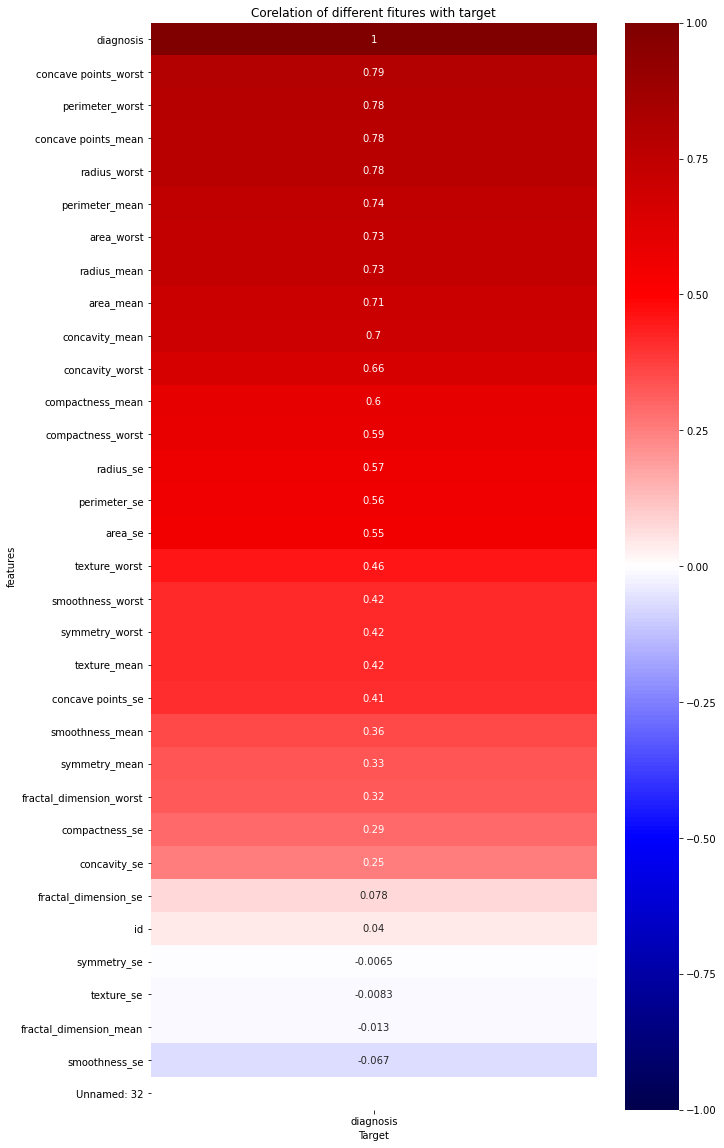

In [20]:
corr_new_train=df1.corr()
plt.figure(figsize=(10,20))
sns.heatmap(corr_new_train[['diagnosis']].sort_values(by=['diagnosis'],ascending=False).head(60),vmin=-1, cmap='seismic', annot=True)
plt.ylabel('features')
plt.xlabel('Target')
plt.title("Corelation of different fitures with target")
plt.show()

In [21]:
df1.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [22]:
fs1 = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean',
       'radius_se', 'perimeter_se', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se', 
       'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [23]:
len(fs1)

26

In [24]:
df_fs1 = df1[fs1]
df_fs1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,8.589,153.40,0.04904,0.05373,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,3.398,74.08,0.01308,0.01860,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,4.585,94.03,0.04006,0.03832,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,3.445,27.23,0.07458,0.05661,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,5.438,94.44,0.02461,0.05688,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
df_fs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  radius_se                569 non-null    float64
 11  perimeter_se             569 non-null    float64
 12  area_se                  569 non-null    float64
 13  compactness_se           569 non-null    float64
 14  concavity_se             5

In [26]:
SEED = 42

data = df_fs1.copy()
y = data['diagnosis']
x = data.drop(['diagnosis'],axis=1)


from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.1,random_state = SEED)

In [27]:
x_train.shape

(512, 25)

In [28]:
from tensorflow.keras import models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import numpy
numpy.random.seed(7)
model = models.Sequential()
model.add(Dense(30,input_dim=25,activation='relu'))  # Adding input layer of 30 Neurons and 15 inputs
# model.add(Dropout(0.5))                           # Adding droupout layer to overcome overfitting
model.add(Dense(15,activation='relu'))               # Adding 1 hidden layer of 15 Neurons
model.add(Dropout(0.5))                              # Adding droupout layer to overcome overfitting
model.add(Dense(5,activation='relu'))                # Adding 1 hidden layer of 3 Neurons
# model.add(Dropout(0.5))                              # Adding droupout layer to overcome overfitting
model.add(Dense(1,activation='sigmoid'))             # Output layer of 1 neuron of sigmoid type
#Compile mode
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Fit the model
# model.fit(train,target,epochs=150, batch_size=20, verbose=1)

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                780       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                465       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(x_train,y_train,epochs=200, batch_size=20, verbose=1)

Epoch 1/200
26/26 [==============================] - 0s 2ms/step - loss: 24.3067 - accuracy: 0.4004
Epoch 2/200
26/26 [==============================] - 0s 2ms/step - loss: 2.4862 - accuracy: 0.5449
Epoch 3/200
26/26 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.6992
Epoch 4/200
26/26 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.6934
Epoch 5/200
26/26 [==============================] - 0s 2ms/step - loss: 0.6303 - accuracy: 0.6973
Epoch 6/200
26/26 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.6953
Epoch 7/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.7520
Epoch 8/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.7285
Epoch 9/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.7520
Epoch 10/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7617
Epoch 11

In [31]:
tfjs.converters.save_keras_model(model, 'models_cancer')

/opt/conda/lib/python3.7/site-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [32]:
from sklearn.metrics import accuracy_score

prc = model.predict(x_val)
# round predictions
prc = [round(x[0]) for x in prc]
accuracy_score(y_val,prc)

0.9473684210526315

In [33]:
# model.save("breast-cancer.h5")

# Heart

In [34]:
df2 = pd.read_csv("../input/heardiseasedata/heart.csv")
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
df2['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

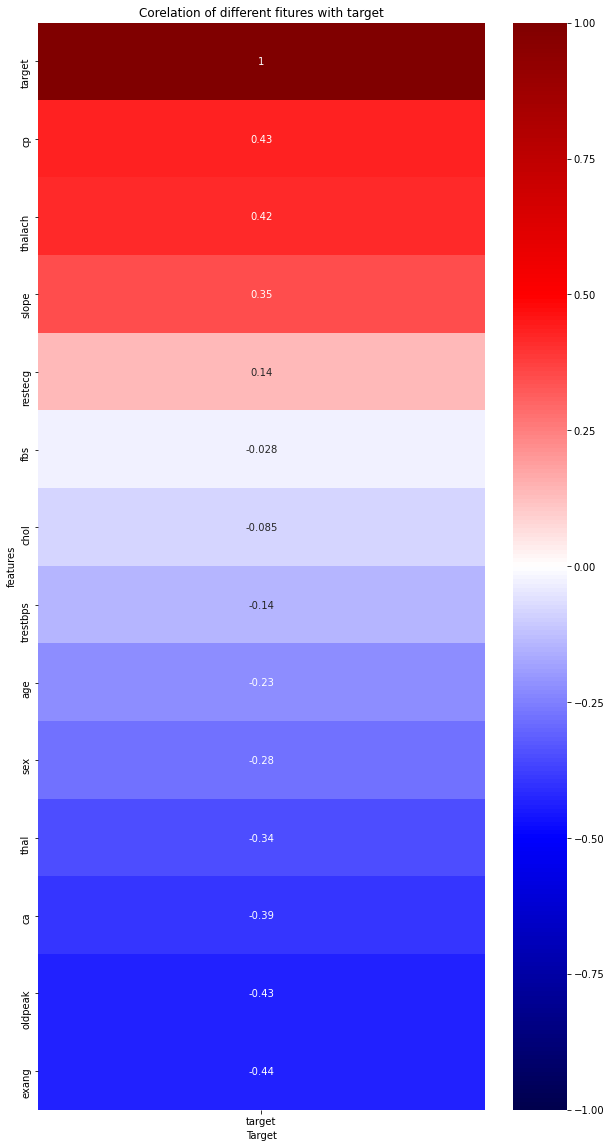

In [37]:
corr_new_train=df2.corr()
plt.figure(figsize=(10,20))
sns.heatmap(corr_new_train[['target']].sort_values(by=['target'],ascending=False).head(60),vmin=-1, cmap='seismic', annot=True)
plt.ylabel('features')
plt.xlabel('Target')
plt.title("Corelation of different fitures with target")
plt.show()

In [38]:
df2.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [39]:
fs2 = ["cp","slope","restecg","thalach","target"]

In [40]:
df_fs2 = df2[fs2]
df_fs2.head()

,cp,slope,restecg,thalach,target
0,3,0,0,150,1
1,2,0,1,187,1
2,1,2,0,172,1
3,1,2,1,178,1
4,0,2,1,163,1


In [41]:
df_fs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cp       303 non-null    int64
 1   slope    303 non-null    int64
 2   restecg  303 non-null    int64
 3   thalach  303 non-null    int64
 4   target   303 non-null    int64
dtypes: int64(5)
memory usage: 12.0 KB


In [42]:
SEED = 42

data = df_fs2.copy()
y = data['target']
x = data.drop(['target'],axis=1)


from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.08,random_state = SEED)

In [43]:
x_train.shape

(278, 4)

In [44]:
from tensorflow.keras import models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import numpy
numpy.random.seed(7)
model = models.Sequential()
model.add(Dense(30,input_dim=4,activation='relu'))  # Adding input layer of 30 Neurons and 15 inputs
# model.add(Dropout(0.5))                           # Adding droupout layer to overcome overfitting
model.add(Dense(15,activation='relu'))               # Adding 1 hidden layer of 15 Neurons
model.add(Dropout(0.5))                              # Adding droupout layer to overcome overfitting
model.add(Dense(5,activation='relu'))                # Adding 1 hidden layer of 3 Neurons
# model.add(Dropout(0.5))                              # Adding droupout layer to overcome overfitting
model.add(Dense(1,activation='sigmoid'))             # Output layer of 1 neuron of sigmoid type
#Compile mode
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Fit the model
# model.fit(train,target,epochs=150, batch_size=20, verbose=1)

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                150       
_________________________________________________________________
dense_9 (Dense)              (None, 15)                465       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(x_train,y_train,epochs=1000, batch_size=20, verbose=1)

Epoch 1/1000
14/14 [==============================] - 0s 4ms/step - loss: 12.0600 - accuracy: 0.5180
Epoch 2/1000
14/14 [==============================] - 0s 4ms/step - loss: 8.3897 - accuracy: 0.4892
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 6.4040 - accuracy: 0.5180
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 4.0616 - accuracy: 0.5360
Epoch 5/1000
14/14 [==============================] - 0s 2ms/step - loss: 4.7349 - accuracy: 0.4532
Epoch 6/1000
14/14 [==============================] - 0s 2ms/step - loss: 3.3317 - accuracy: 0.5036
Epoch 7/1000
14/14 [==============================] - 0s 4ms/step - loss: 2.7580 - accuracy: 0.4892
Epoch 8/1000
14/14 [==============================] - 0s 2ms/step - loss: 2.0963 - accuracy: 0.5072
Epoch 9/1000
14/14 [==============================] - 0s 2ms/step - loss: 2.1387 - accuracy: 0.5180
Epoch 10/1000
14/14 [==============================] - 0s 2ms/step - loss: 1.4882 - accuracy: 0.489

In [47]:
from sklearn.metrics import accuracy_score

prc = model.predict(x_val)
# round predictions
prc = [round(x[0]) for x in prc]
accuracy_score(y_val,prc)

0.56

In [48]:
tfjs.converters.save_keras_model(model, 'model_heart')

/opt/conda/lib/python3.7/site-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


# malaria

In [49]:
import cv2
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
width = 128
height = 128

In [51]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [52]:
trainDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [53]:
valDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


In [54]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)       

In [56]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [58]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =20,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop])

Epoch 1/20
1378/1378 [==============================] - 82s 60ms/step - loss: 0.5242 - accuracy: 0.7199 - val_loss: 0.2097 - val_accuracy: 0.9354
Epoch 2/20
1378/1378 [==============================] - 44s 32ms/step - loss: 0.2034 - accuracy: 0.9337 - val_loss: 0.1652 - val_accuracy: 0.9348
Epoch 3/20
1378/1378 [==============================] - 43s 32ms/step - loss: 0.1786 - accuracy: 0.9428 - val_loss: 0.1673 - val_accuracy: 0.9390
Epoch 4/20
1378/1378 [==============================] - 45s 32ms/step - loss: 0.1607 - accuracy: 0.9524 - val_loss: 0.1669 - val_accuracy: 0.9394


In [59]:
tfjs.converters.save_keras_model(model, 'malaria_model')

# pneumonia:

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2

In [61]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [62]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.4.0) /tmp/pip-req-build-dglzv4yn/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.4.0) /tmp/pip-req-build-dglzv4yn/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.4.0) /tmp/pip-req-build-dglzv4yn/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.4.0) /tmp/pip-req-build-dglzv4yn/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [63]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [64]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [65]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [66]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [67]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 64)       

In [68]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)


In [69]:
early_stop = EarlyStopping(monitor='val_loss',patience=3,mode="min")

In [70]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 10 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [early_stop])

Epoch 1/10
163/163 [==============================] - 11s 65ms/step - loss: 0.5528 - accuracy: 0.8265 - val_loss: 54.0865 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 11s 65ms/step - loss: 0.2776 - accuracy: 0.8932 - val_loss: 40.8011 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 12s 74ms/step - loss: 0.2438 - accuracy: 0.9147 - val_loss: 64.6809 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 10s 61ms/step - loss: 0.2130 - accuracy: 0.9287 - val_loss: 9.2813 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 10s 62ms/step - loss: 0.1997 - accuracy: 0.9312 - val_loss: 5.0514 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 12s 74ms/step - loss: 0.1745 - accuracy: 0.9398 - val_loss: 0.9073 - val_accuracy: 0.4375
Epoch 7/10
163/163 [==============================] - 11s 67ms/step - loss: 0.1760 - accuracy: 0.9434 - val_loss: 2.8308 - val_accura

In [71]:
tfjs.converters.save_keras_model(model, 'pneumonia_model')

# Liver:

In [72]:
df3 = pd.read_csv("../input/indian-liver-patient-records/indian_liver_patient.csv")
df3.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [73]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [74]:
df3["Albumin_and_Globulin_Ratio"].mean()

0.9470639032815201

In [75]:
df3["Albumin_and_Globulin_Ratio"].median()

0.93

In [76]:
median = df3["Albumin_and_Globulin_Ratio"].median()

df3["Albumin_and_Globulin_Ratio"]=df3["Albumin_and_Globulin_Ratio"].fillna(median)

In [77]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [78]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
diag = ["Dataset"]
for i in diag:
    df3[i]=label_encoder.fit_transform(df3[i])

In [79]:
df3["Dataset"].value_counts()

0    416
1    167
Name: Dataset, dtype: int64

In [80]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
diag = ["Gender"]
for i in diag:
    df3[i]=label_encoder.fit_transform(df3[i])

In [81]:
df3.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


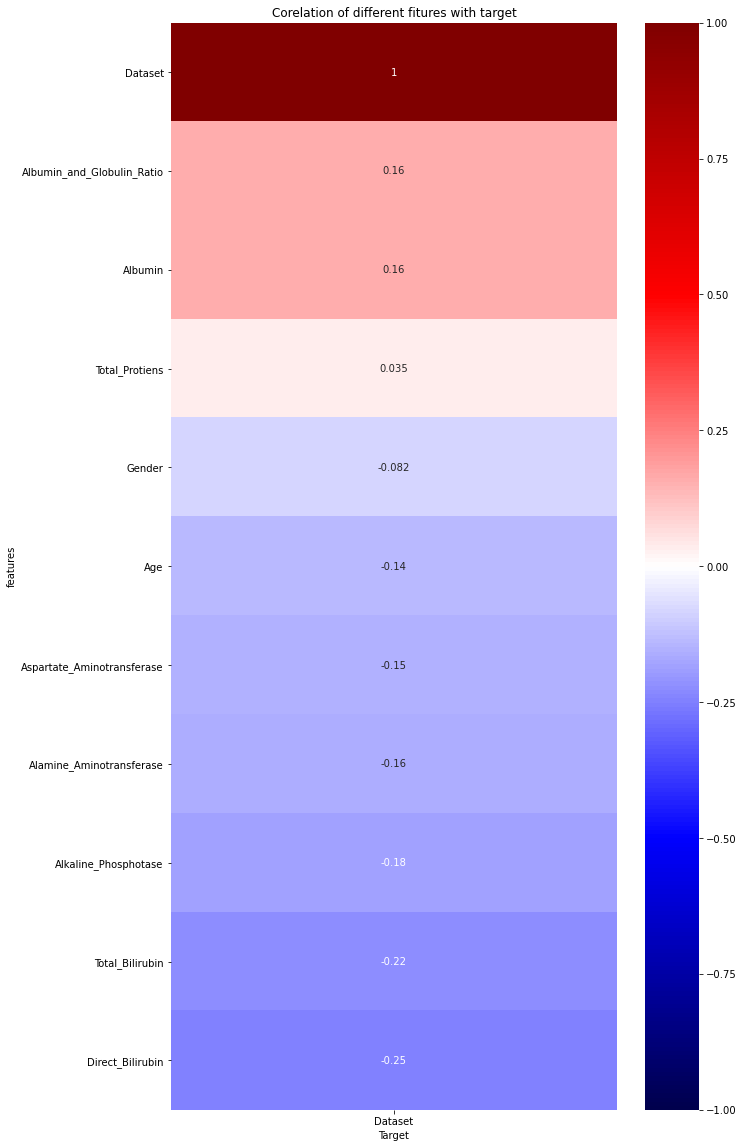

In [82]:
corr_new_train=df3.corr()
plt.figure(figsize=(10,20))
sns.heatmap(corr_new_train[['Dataset']].sort_values(by=['Dataset'],ascending=False).head(60),vmin=-1, cmap='seismic', annot=True)
plt.ylabel('features')
plt.xlabel('Target')
plt.title("Corelation of different fitures with target")
plt.show()

In [83]:
df3.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [84]:
from sklearn.utils import resample

In [85]:
# Split data on majority and minority.. minority is dataset == 2
minority = df3[df3.Dataset==1]
majority = df3[df3.Dataset==0]

print('Minority size:', minority.shape)
print('Majority size:', majority.shape)

Minority size: (167, 11)
Majority size: (416, 11)


In [86]:
# choosing upsample as even now we do not have too much data
minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
print('Minority upsampled size:', minority_upsample.shape)

Minority upsampled size: (416, 11)


In [87]:
# merge majority with upsampled minority
df3_1 = pd.concat([minority_upsample, majority], axis=0)

In [88]:
SEED = 42

data = df3_1.copy()
y = data['Dataset']
x = data.drop(['Dataset'],axis=1)


from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.08,random_state = SEED)

In [89]:
x_train.shape

(765, 10)

In [90]:
from tensorflow.keras import models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import numpy
numpy.random.seed(7)
model = models.Sequential()
model.add(Dense(30,input_dim=10,activation='relu'))  
# model.add(Dropout(0.5))                           # Adding droupout layer to overcome overfitting
model.add(Dense(15,activation='relu'))               # Adding 1 hidden layer of 15 Neurons
model.add(Dropout(0.5))                              # Adding droupout layer to overcome overfitting
model.add(Dense(5,activation='relu'))                # Adding 1 hidden layer of 3 Neurons
# model.add(Dropout(0.5))                              # Adding droupout layer to overcome overfitting
model.add(Dense(1,activation='sigmoid'))             # Output layer of 1 neuron of sigmoid type
#Compile mode
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [91]:
model.fit(x_train,y_train,epochs=200, batch_size=20, verbose=1)

Epoch 1/200
39/39 [==============================] - 0s 2ms/step - loss: 14.6465 - accuracy: 0.5059
Epoch 2/200
39/39 [==============================] - 0s 2ms/step - loss: 7.8554 - accuracy: 0.4850
Epoch 3/200
39/39 [==============================] - 0s 2ms/step - loss: 3.4465 - accuracy: 0.4967
Epoch 4/200
39/39 [==============================] - 0s 2ms/step - loss: 2.1878 - accuracy: 0.5163
Epoch 5/200
39/39 [==============================] - 0s 2ms/step - loss: 1.4171 - accuracy: 0.5111
Epoch 6/200
39/39 [==============================] - 0s 2ms/step - loss: 1.0619 - accuracy: 0.5333
Epoch 7/200
39/39 [==============================] - 0s 2ms/step - loss: 1.0619 - accuracy: 0.5242
Epoch 8/200
39/39 [==============================] - 0s 2ms/step - loss: 0.8408 - accuracy: 0.5085
Epoch 9/200
39/39 [==============================] - 0s 2ms/step - loss: 0.7997 - accuracy: 0.5320
Epoch 10/200
39/39 [==============================] - 0s 2ms/step - loss: 0.7772 - accuracy: 0.4954
Epoch 11

In [92]:
from sklearn.metrics import accuracy_score

prc = model.predict(x_val)
# round predictions
prc = [round(x[0]) for x in prc]
accuracy_score(y_val,prc)

0.6119402985074627

In [93]:
tfjs.converters.save_keras_model(model, 'model_liver')

/opt/conda/lib/python3.7/site-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [94]:
model.save("liver_701p.h5")

# kidney:

data cleaning is referenced from here https://www.kaggle.com/mvbalaji/ckd-prediction-using-diff-models-with-hp-tuning

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import missingno as msno 
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.simplefilter('ignore')

from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [96]:
ckd_df = pd.read_csv("../input/ckdisease/kidney_disease.csv")
ckd_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [97]:
ckd_df[ckd_df['classification']==1]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [98]:
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [99]:
def display_confusion_matrix(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred_lr)
  group_names = ["True Neg","False Pos","False Neg","True Pos"]
  group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
  print(classification_report(y_test, y_pred))

In [100]:
col_dict={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

ckd_df.rename(columns=col_dict, inplace=True)


In [101]:
ckd_df.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [102]:
ckd_df['diabetes_mellitus'] =ckd_df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
ckd_df['coronary_artery_disease'] = ckd_df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
ckd_df['white_blood_cell_count'] = ckd_df['white_blood_cell_count'].replace(to_replace='\t8400',value='8400')

In [103]:
ckd_df.classification=ckd_df.classification.replace("ckd\t","ckd")

In [104]:
ckd_df["classification"].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [105]:
ckd_df["white_blood_cell_count"]=ckd_df["white_blood_cell_count"].replace("\t?", np.nan)
ckd_df["red_blood_cell_count"]=ckd_df["red_blood_cell_count"].replace("\t?", np.nan)
ckd_df['diabetes_mellitus'] = ckd_df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
ckd_df['coronary_artery_disease'] = ckd_df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
ckd_df['white_blood_cell_count'] = ckd_df['white_blood_cell_count'].replace(to_replace='\t8400',value='8400')
ckd_df["packed_cell_volume"]= ckd_df["packed_cell_volume"].replace("\t?", np.nan)

In [106]:
for c in ckd_df.columns:
  print(c,ckd_df[c].unique())

id [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245

In [107]:
for string_column in ["red_blood_cells","pus_cell","pus_cell_clumps","bacteria","hypertension","diabetes_mellitus","coronary_artery_disease","pedal_edema","anemia","appetite"]:
  ckd_df[string_column]=ckd_df[string_column].astype(str)

In [108]:
ckd_df['red_blood_cells']=ckd_df['red_blood_cells'].replace({'normal':1,'abnormal':0})
ckd_df['pus_cell']=ckd_df['pus_cell'].replace({'normal':1,'abnormal':0})
ckd_df['pus_cell_clumps']=ckd_df['pus_cell_clumps'].replace({'notpresent':0,'present':1})
ckd_df['bacteria']=ckd_df['bacteria'].replace({'notpresent':0,'present':1})
ckd_df['hypertension']=ckd_df['hypertension'].replace({'no':0,'yes':1})
ckd_df['diabetes_mellitus']=ckd_df['diabetes_mellitus'].replace({'no':0,'yes':1})
ckd_df['coronary_artery_disease']=ckd_df['coronary_artery_disease'].replace({'no':0,'yes':1})
ckd_df['pedal_edema']=ckd_df['pedal_edema'].replace({'no':0,'yes':1})
ckd_df['anemia']=ckd_df['anemia'].replace({'no':0,'yes':1})
ckd_df['appetite']=ckd_df['appetite'].replace({'poor':0,'good':1})

In [109]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [110]:
impute_columns=list(set(ckd_df.columns)-set(["classification"]))
print(impute_columns)

['blood_glucose_random', 'potassium', 'pedal_edema', 'anemia', 'coronary_artery_disease', 'albumin', 'packed_cell_volume', 'sugar', 'pus_cell_clumps', 'hypertension', 'diabetes_mellitus', 'id', 'red_blood_cell_count', 'serum_creatinine', 'pus_cell', 'sodium', 'red_blood_cells', 'appetite', 'age', 'specific_gravity', 'white_blood_cell_count', 'bacteria', 'hemoglobin', 'blood_pressure', 'blood_urea']


In [111]:
imputer.fit(ckd_df[impute_columns])

KNNImputer()

In [112]:
X_trans=pd.DataFrame(imputer.transform(ckd_df[impute_columns]), columns=impute_columns)

In [113]:
X_trans.head()

,blood_glucose_random,potassium,pedal_edema,anemia,coronary_artery_disease,albumin,packed_cell_volume,sugar,pus_cell_clumps,hypertension,diabetes_mellitus,id,red_blood_cell_count,serum_creatinine,pus_cell,sodium,red_blood_cells,appetite,age,specific_gravity,white_blood_cell_count,bacteria,hemoglobin,blood_pressure,blood_urea
0,121.0,3.96,0.0,0.0,0.0,1.0,44.0,0.0,0.0,1.0,1.0,0.0,5.20,1.2,1.0,131.6,0.2,1.0,48.0,1.020,7800.0,0.0,15.4,80.0,36.0
1,180.8,4.00,0.0,0.0,0.0,4.0,38.0,0.0,0.0,0.0,0.0,1.0,3.58,0.8,1.0,129.4,0.4,1.0,7.0,1.020,6000.0,0.0,11.3,50.0,18.0
2,423.0,4.50,0.0,1.0,0.0,2.0,31.0,3.0,0.0,0.0,1.0,2.0,3.56,1.8,1.0,134.2,1.0,0.0,62.0,1.010,7500.0,0.0,9.6,80.0,53.0
3,117.0,2.50,1.0,1.0,0.0,4.0,32.0,0.0,1.0,1.0,0.0,3.0,3.90,3.8,0.0,111.0,1.0,0.0,48.0,1.005,6700.0,0.0,11.2,70.0,56.0
4,106.0,3.82,0.0,0.0,0.0,2.0,35.0,0.0,0.0,0.0,0.0,4.0,4.60,1.4,1.0,129.8,1.0,1.0,51.0,1.010,7300.0,0.0,11.6,80.0,26.0


In [114]:
print (round((X_trans.isnull().sum() * 100/ len(X_trans)),2).sort_values(ascending=False))

blood_urea                 0.0
id                         0.0
potassium                  0.0
pedal_edema                0.0
anemia                     0.0
coronary_artery_disease    0.0
albumin                    0.0
packed_cell_volume         0.0
sugar                      0.0
pus_cell_clumps            0.0
hypertension               0.0
diabetes_mellitus          0.0
red_blood_cell_count       0.0
blood_pressure             0.0
serum_creatinine           0.0
pus_cell                   0.0
sodium                     0.0
red_blood_cells            0.0
appetite                   0.0
age                        0.0
specific_gravity           0.0
white_blood_cell_count     0.0
bacteria                   0.0
hemoglobin                 0.0
blood_glucose_random       0.0
dtype: float64


In [115]:
x=X_trans[X_trans["id"].isin(ckd_df["id"])].drop(["id"],axis=1)

In [116]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blood_glucose_random     400 non-null    float64
 1   potassium                400 non-null    float64
 2   pedal_edema              400 non-null    float64
 3   anemia                   400 non-null    float64
 4   coronary_artery_disease  400 non-null    float64
 5   albumin                  400 non-null    float64
 6   packed_cell_volume       400 non-null    float64
 7   sugar                    400 non-null    float64
 8   pus_cell_clumps          400 non-null    float64
 9   hypertension             400 non-null    float64
 10  diabetes_mellitus        400 non-null    float64
 11  red_blood_cell_count     400 non-null    float64
 12  serum_creatinine         400 non-null    float64
 13  pus_cell                 400 non-null    float64
 14  sodium                   4

In [117]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
diag = ["classification"]
for i in diag:
    ckd_df[i]=label_encoder.fit_transform(ckd_df[i])

In [118]:
y=ckd_df["classification"]

In [119]:
df5 = pd.concat([x,y],axis=1)
df5.head()

,blood_glucose_random,potassium,pedal_edema,anemia,coronary_artery_disease,albumin,packed_cell_volume,sugar,pus_cell_clumps,hypertension,diabetes_mellitus,red_blood_cell_count,serum_creatinine,pus_cell,sodium,red_blood_cells,appetite,age,specific_gravity,white_blood_cell_count,bacteria,hemoglobin,blood_pressure,blood_urea,classification
0,121.0,3.96,0.0,0.0,0.0,1.0,44.0,0.0,0.0,1.0,1.0,5.20,1.2,1.0,131.6,0.2,1.0,48.0,1.020,7800.0,0.0,15.4,80.0,36.0,0
1,180.8,4.00,0.0,0.0,0.0,4.0,38.0,0.0,0.0,0.0,0.0,3.58,0.8,1.0,129.4,0.4,1.0,7.0,1.020,6000.0,0.0,11.3,50.0,18.0,0
2,423.0,4.50,0.0,1.0,0.0,2.0,31.0,3.0,0.0,0.0,1.0,3.56,1.8,1.0,134.2,1.0,0.0,62.0,1.010,7500.0,0.0,9.6,80.0,53.0,0
3,117.0,2.50,1.0,1.0,0.0,4.0,32.0,0.0,1.0,1.0,0.0,3.90,3.8,0.0,111.0,1.0,0.0,48.0,1.005,6700.0,0.0,11.2,70.0,56.0,0
4,106.0,3.82,0.0,0.0,0.0,2.0,35.0,0.0,0.0,0.0,0.0,4.60,1.4,1.0,129.8,1.0,1.0,51.0,1.010,7300.0,0.0,11.6,80.0,26.0,0


In [120]:
df5["classification"].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [121]:
# corr_new_train=df5.corr()
# plt.figure(figsize=(10,20))
# sns.heatmap(corr_new_train[['classification']].sort_values(by=['classification'],ascending=False).head(60),vmin=-1, cmap='seismic', annot=True)
# plt.ylabel('features')
# plt.xlabel('Target')
# plt.title("Corelation of different fitures with target")
# plt.show()

In [122]:
SEED = 42

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.08,random_state = SEED)

In [123]:
x_train.shape

(368, 24)

In [124]:
from tensorflow.keras import models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import numpy
numpy.random.seed(7)
model = models.Sequential()
model.add(Dense(30,input_dim=24,activation='relu'))  # Adding input layer of 30 Neurons and 15 inputs
# model.add(Dropout(0.5))                           # Adding droupout layer to overcome overfitting
model.add(Dense(15,activation='relu'))               # Adding 1 hidden layer of 15 Neurons
model.add(Dropout(0.5))                              # Adding droupout layer to overcome overfitting
model.add(Dense(5,activation='relu'))                # Adding 1 hidden layer of 3 Neurons
# model.add(Dropout(0.5))                              # Adding droupout layer to overcome overfitting
model.add(Dense(1,activation='sigmoid'))             # Output layer of 1 neuron of sigmoid type
#Compile mode
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [125]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 30)                750       
_________________________________________________________________
dense_21 (Dense)             (None, 15)                465       
_________________________________________________________________
dropout_12 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 6         
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.fit(x_train,y_train,epochs=200, batch_size=20, verbose=1)

Epoch 1/200
19/19 [==============================] - 0s 2ms/step - loss: 366.7219 - accuracy: 0.5734
Epoch 2/200
19/19 [==============================] - 0s 5ms/step - loss: 179.2060 - accuracy: 0.5707
Epoch 3/200
19/19 [==============================] - 0s 4ms/step - loss: 122.2926 - accuracy: 0.5000
Epoch 4/200
19/19 [==============================] - 0s 4ms/step - loss: 62.4273 - accuracy: 0.4375
Epoch 5/200
19/19 [==============================] - 0s 4ms/step - loss: 19.3719 - accuracy: 0.4348
Epoch 6/200
19/19 [==============================] - 0s 4ms/step - loss: 13.6201 - accuracy: 0.4103
Epoch 7/200
19/19 [==============================] - 0s 4ms/step - loss: 7.3300 - accuracy: 0.4674
Epoch 8/200
19/19 [==============================] - 0s 4ms/step - loss: 4.5379 - accuracy: 0.5978
Epoch 9/200
19/19 [==============================] - 0s 4ms/step - loss: 2.6594 - accuracy: 0.6223
Epoch 10/200
19/19 [==============================] - 0s 4ms/step - loss: 1.9008 - accuracy: 0.6141


In [127]:
from sklearn.metrics import accuracy_score

prc = model.predict(x_val)
# round predictions
prc = [round(x[0]) for x in prc]
accuracy_score(y_val,prc)

0.625

In [128]:
tfjs.converters.save_keras_model(model, 'model_kidny')

# COVID:

In [129]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf 
from tensorflow.keras.preprocessing import image
import glob

In [130]:
DATASET_DIR = "/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database"

os.listdir(DATASET_DIR)


['Viral Pneumonia.matadata.xlsx',
 'NORMAL.metadata.xlsx',
 'COVID-19',
 'COVID-19.metadata.xlsx',
 'README.md.txt',
 'NORMAL',
 'Viral Pneumonia']

In [131]:
normal_images = []
count = 0

for img_path in glob.glob(DATASET_DIR + "/NORMAL/*"):
    count += 1
    normal_images.append(image.load_img(str(img_path), target_size = (150,150,3)))
    if count > 230:
        break
    

In [132]:
covid_images = []
for img_path in glob.glob(DATASET_DIR + "/COVID-19/*"): 
    covid_images.append(image.load_img(str(img_path), target_size = (150,150,3)))

## Normal->1, covid->0

In [133]:
images_together = []

for i in normal_images:
    images_together.append(img_to_array(i))
    
for i in covid_images:
    images_together.append(img_to_array(i))
    
targets = np.zeros(len(images_together))
targets[:len(normal_images)-1] = 1

In [134]:
targets = np.array(targets)
print("targets: ",targets.shape)
targets = targets.reshape(-1,1)
print("new shape of targets: ",targets.shape)

targets:  (450,)
new shape of targets:  (450, 1)


In [135]:
images_together = np.array(images_together)
print("shape of images together: ",images_together.shape)

shape of images together:  (450, 150, 150, 3)


In [136]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images_together, targets, test_size=0.25, stratify=targets)

images_together = np.concatenate((X_train, X_val))
targets = np.concatenate((y_train, y_val))

In [137]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 35
BATCH_SIZE = 40

In [138]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = INPUT_SHAPE, activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 48, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))
model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

# compile 
model.compile(loss = "binary_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [139]:
model1 = Sequential()
model1.add(Conv2D(16,(3,3),activation='relu',input_shape=INPUT_SHAPE))
model1.add(MaxPool2D(2,2))
model1.add(Dropout(0.2))

model1.add(Conv2D(32,(3,3),activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Dropout(0.3))

model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Dropout(0.3))

model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.3))

model1.add(Dense(1,activation='sigmoid'))

model1.compile(loss = "binary_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [140]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 64)       

In [141]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 48)        13872     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 48)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 64)        27712     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 33, 33, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 33, 33, 64)       

In [142]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  validation_split = 0.25)


train_generator = train_datagen.flow(
images_together, targets,
batch_size = BATCH_SIZE,
subset = "training")

validation_generator = train_datagen.flow(
images_together, targets,
batch_size = BATCH_SIZE,
shuffle = False,
subset = "validation")

#fitting
hist = model.fit_generator(
train_generator,
steps_per_epoch = (450*0.75)//BATCH_SIZE,
validation_data = validation_generator,
validation_steps = (450*0.25)// BATCH_SIZE,
epochs = EPOCHS)

Epoch 1/35
8/8 [==============================] - 2s 257ms/step - loss: 0.8005 - accuracy: 0.4966 - val_loss: 0.6490 - val_accuracy: 0.5250
Epoch 2/35
8/8 [==============================] - 2s 262ms/step - loss: 0.6503 - accuracy: 0.6779 - val_loss: 0.6176 - val_accuracy: 0.6500
Epoch 3/35
8/8 [==============================] - 2s 226ms/step - loss: 0.5851 - accuracy: 0.7114 - val_loss: 0.3654 - val_accuracy: 0.9000
Epoch 4/35
8/8 [==============================] - 2s 222ms/step - loss: 1.8428 - accuracy: 0.7651 - val_loss: 0.4460 - val_accuracy: 0.8000
Epoch 5/35
8/8 [==============================] - 2s 221ms/step - loss: 0.3486 - accuracy: 0.8758 - val_loss: 0.2748 - val_accuracy: 0.8750
Epoch 6/35
8/8 [==============================] - 2s 220ms/step - loss: 0.2785 - accuracy: 0.9195 - val_loss: 0.2477 - val_accuracy: 0.9000
Epoch 7/35
8/8 [==============================] - 2s 221ms/step - loss: 0.2669 - accuracy: 0.8893 - val_loss: 0.4616 - val_accuracy: 0.8000
Epoch 8/35
8/8 [====

In [143]:
print("Training Accuracy: "+str(np.round(hist.history["accuracy"][-1]*100,2))+"%")
print("Validation Accuracy: "+str(np.round(hist.history["val_accuracy"][-1]*100,2))+"%")

Training Accuracy: 96.98%
Validation Accuracy: 96.25%


Training Accuracy: 98.12%

Validation Accuracy: 97.5%

incase of **`model`** it kinda ok, i would say. I actually never faced any situation where val_acc is almost equal to training_acc.

for **`model1`** the acc of both training and validation is 
Training Accuracy: 91.61%
Validation Accuracy: 97.5%

This is a case of overfitting.

#### Solutions:
1. Probably the network is struggling to fit the training data. Hence, try a little bit bigger network.

2. Try a different Deep Neural Network. I mean to say change the architecture a bit.

3. Train for longer time.

4. Try using advanced optimization algorithms.

https://stackoverflow.com/a/45854380/12568833

In [144]:
tfjs.converters.save_keras_model(model, 'model_covid')

In [145]:
# ////////////////////////////////